In [53]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [54]:
myFile = uproot.open('alltestfiles.root')

In [55]:
tree = myFile['TestTree']

In [5]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')
nHitsW = tree.array('nHitsInPfoW')
nHitsU = tree.array('nHitsInPfoU')
nHitsV = tree.array('nHitsInPfoV')

In [6]:
drift_pos_av = driftPos.mean()
wire_pos_av = wirePos.mean()

In [7]:
drift_comp = driftPos - drift_pos_av
wire_comp = wirePos - wire_pos_av
drift_comp_sq = drift_comp ** 2
numerator = (drift_comp * wire_comp).sum()
denominator = (drift_comp_sq).sum()
m = numerator / denominator
c = wire_pos_av - m * drift_pos_av

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [8]:
#pfo_hits = np.array([ len(x) for x in wirePos])

track_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (nHitsW > 0) & (isTrack == 1))

shower_pfos = np.where((completeness > 0.9) & (purity > 0.89) & (nHitsW > 0) & (isTrack == 0))

select_wirePos_tracks = wirePos[track_pfos]

select_driftPos_tracks = driftPos[track_pfos]

select_wirePos_showers = wirePos[shower_pfos]

select_driftPos_showers = driftPos[shower_pfos]

m_tracks = m[track_pfos]

c_tracks = c[track_pfos]

m_showers = m[shower_pfos]

c_showers = c[shower_pfos]

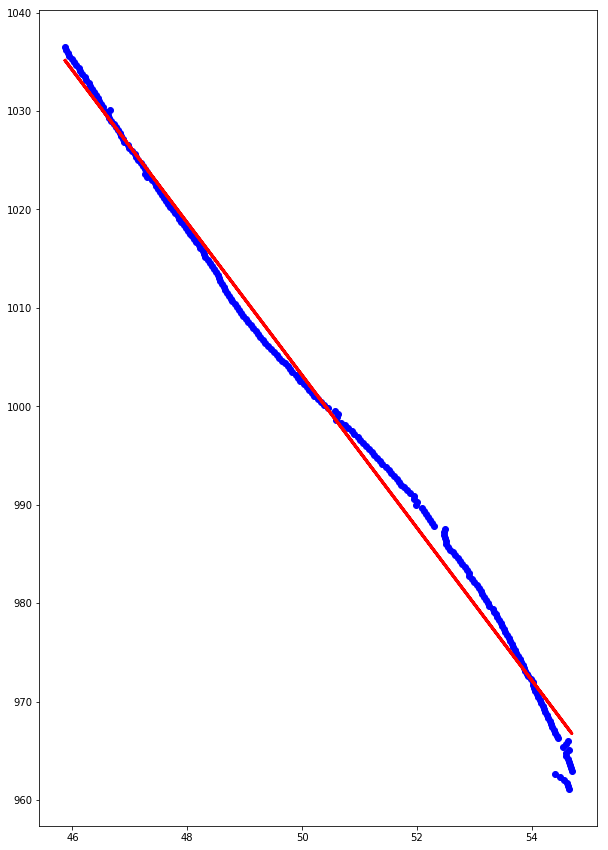

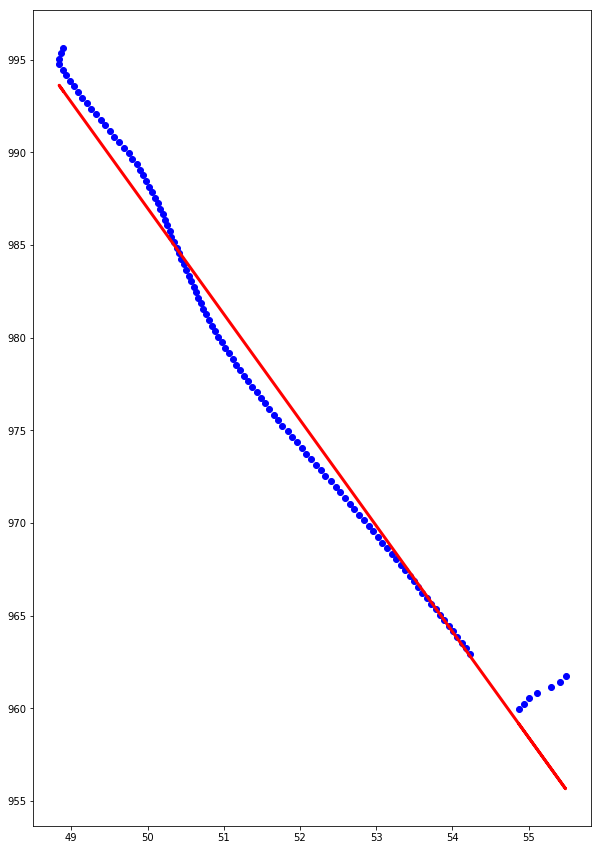

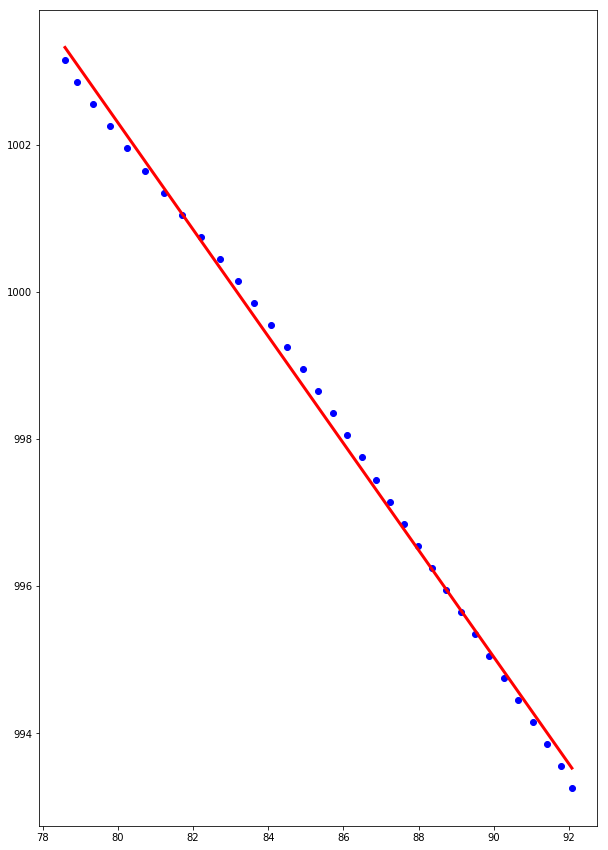

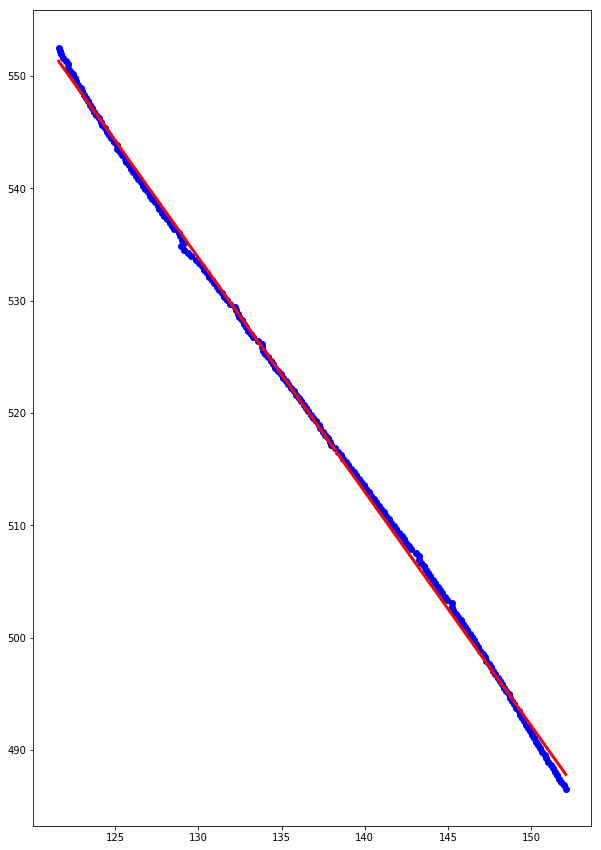

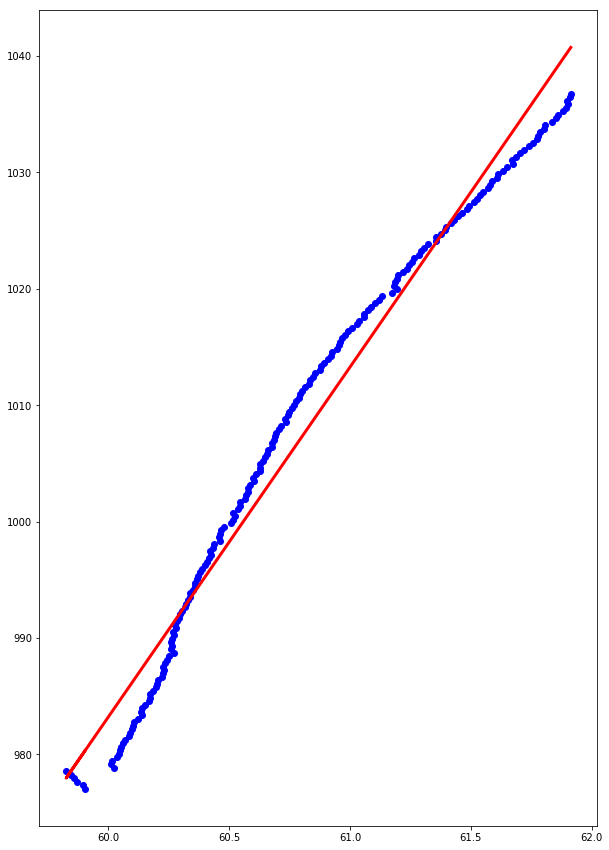

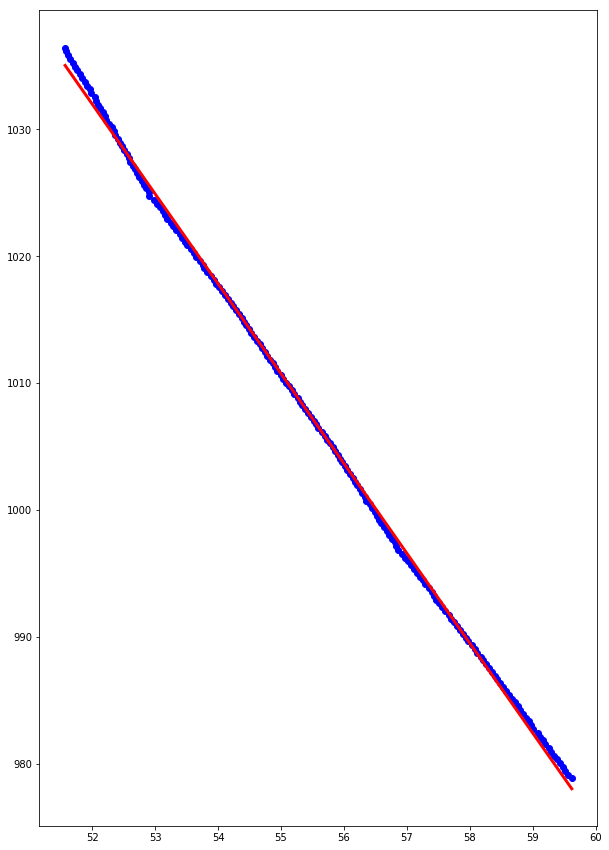

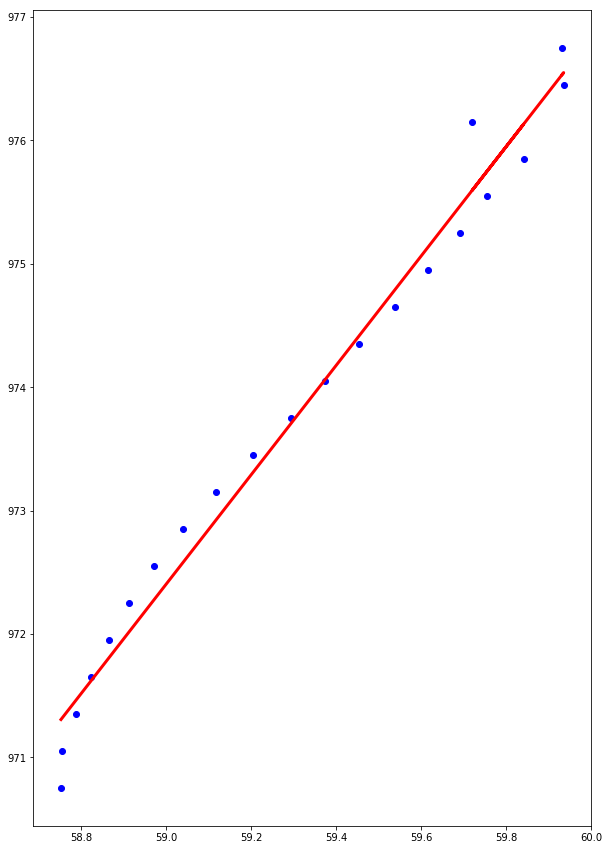

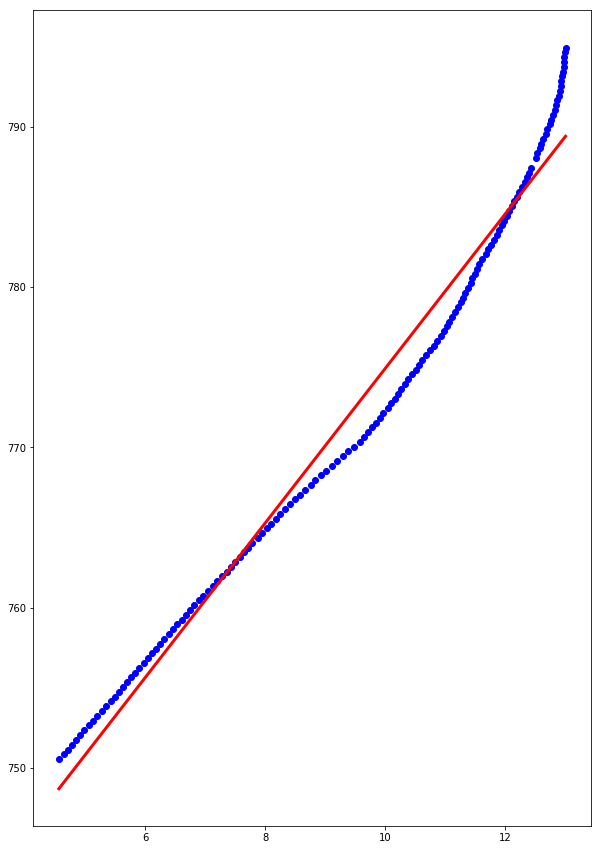

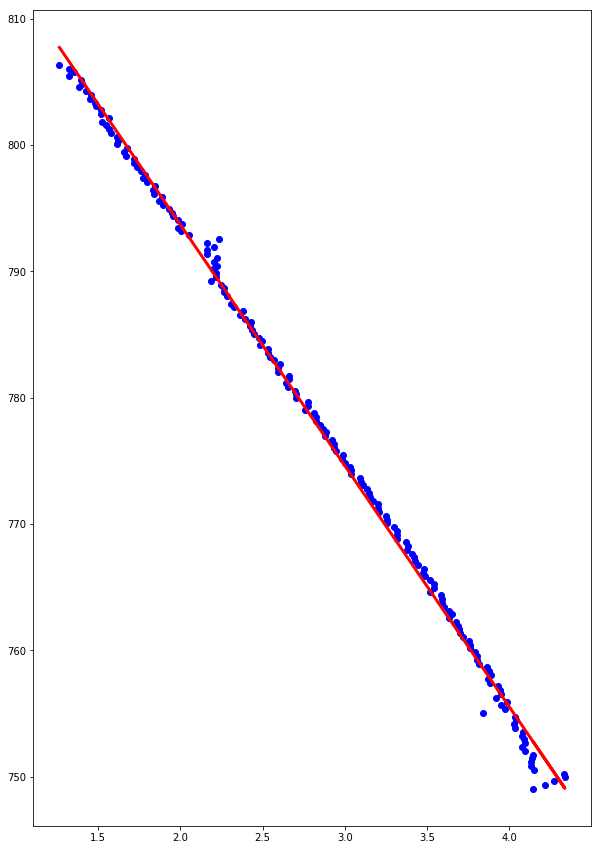

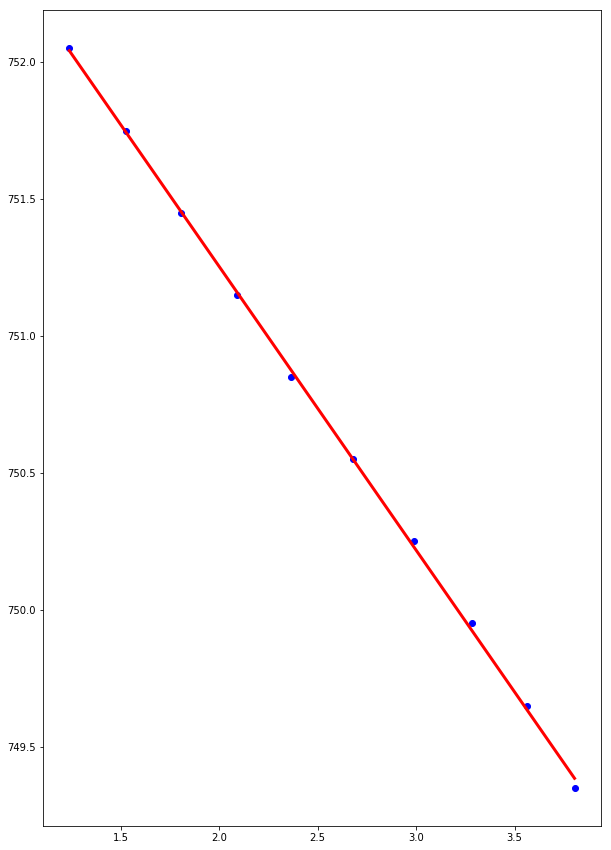

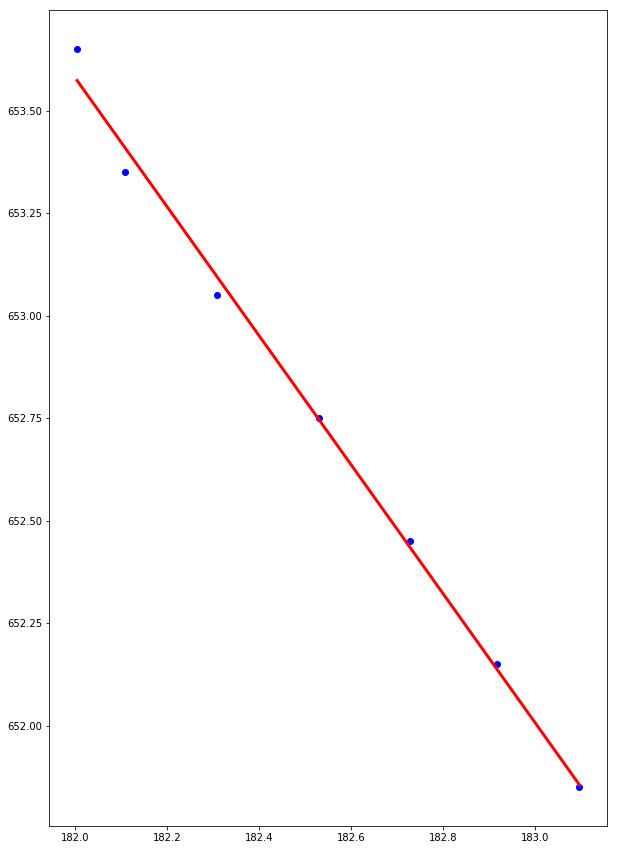

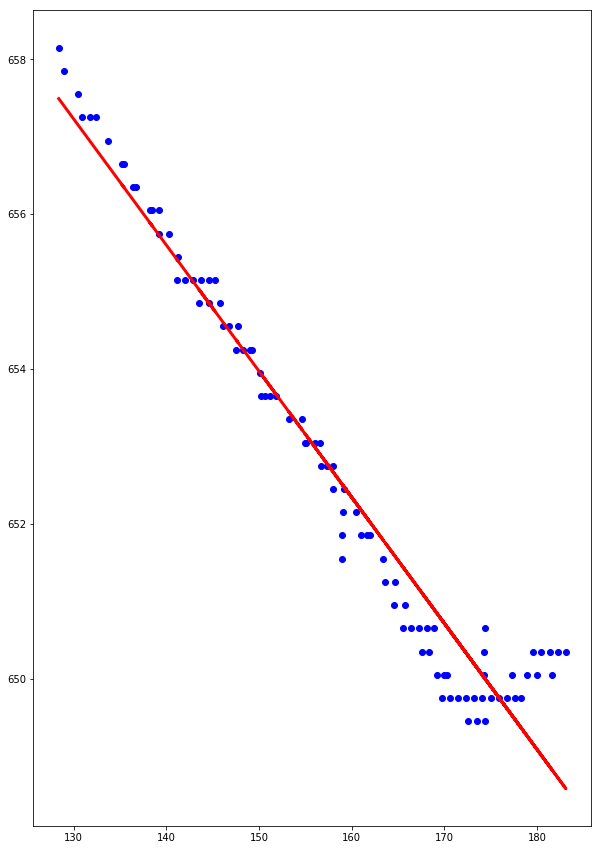

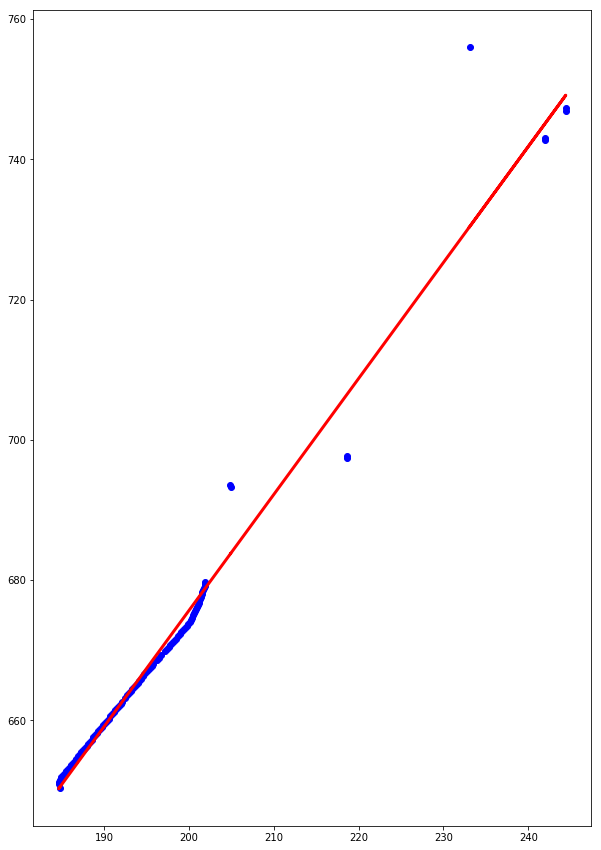

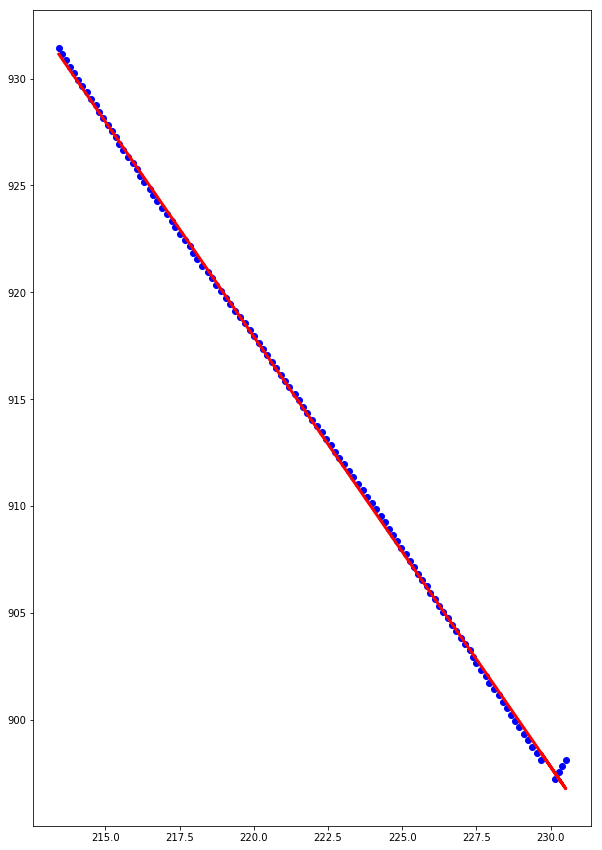

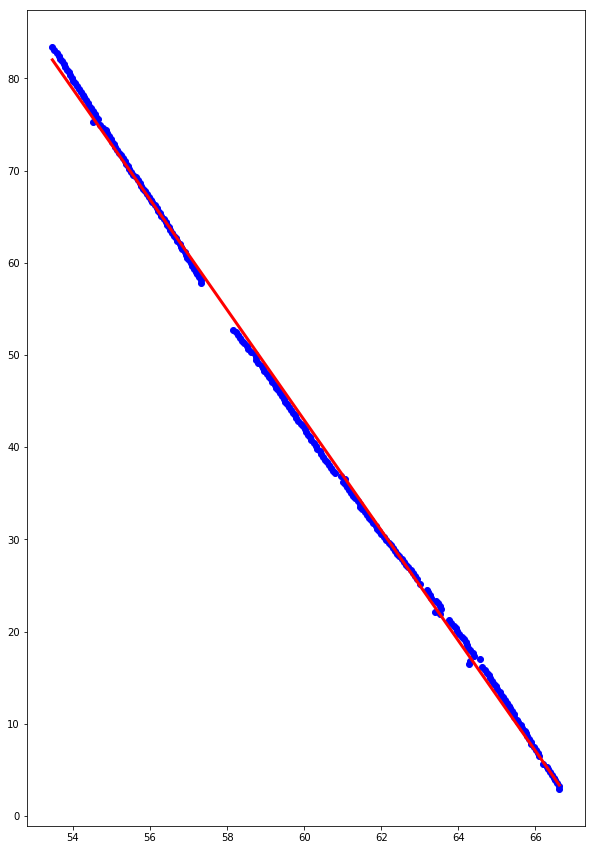

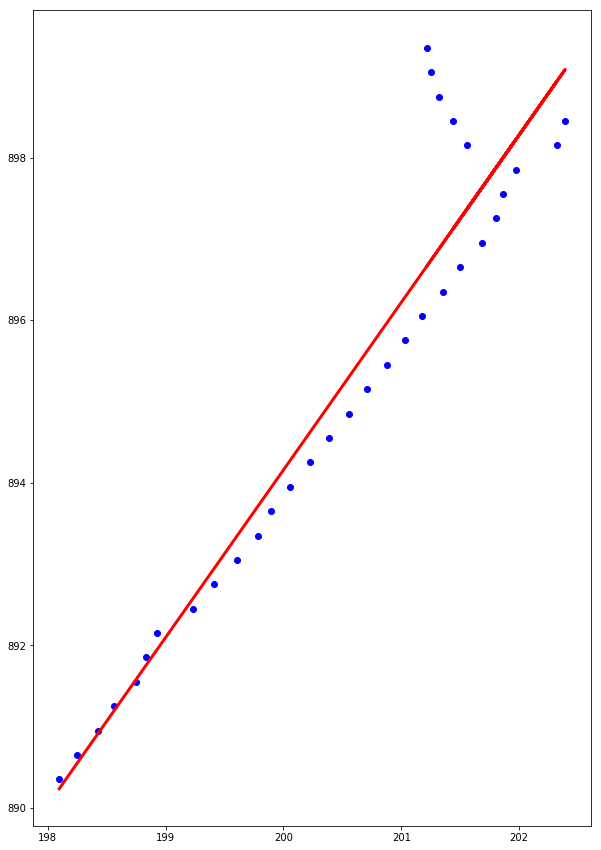

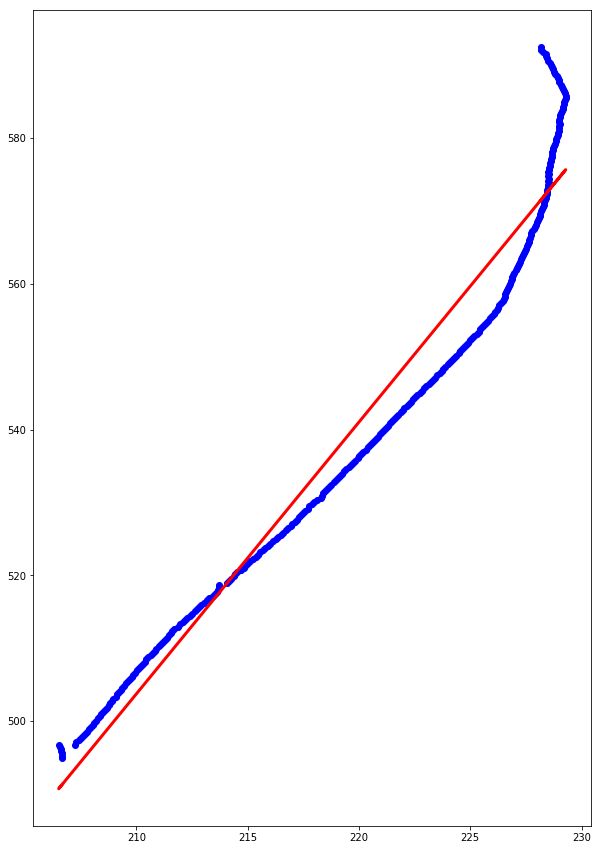

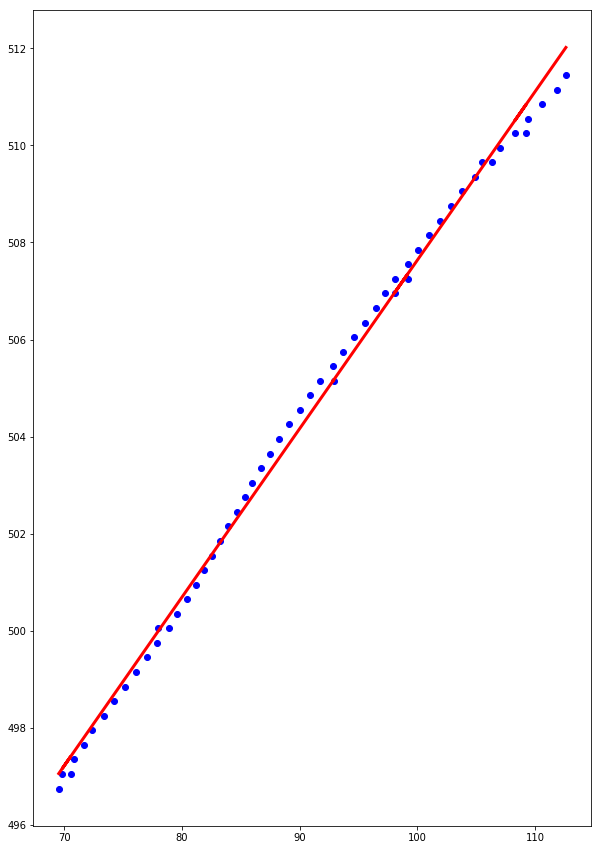

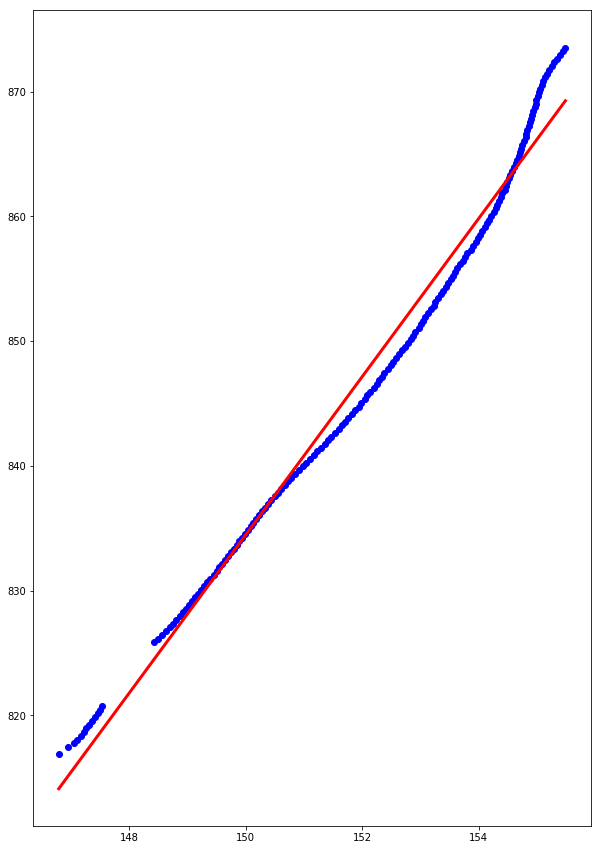

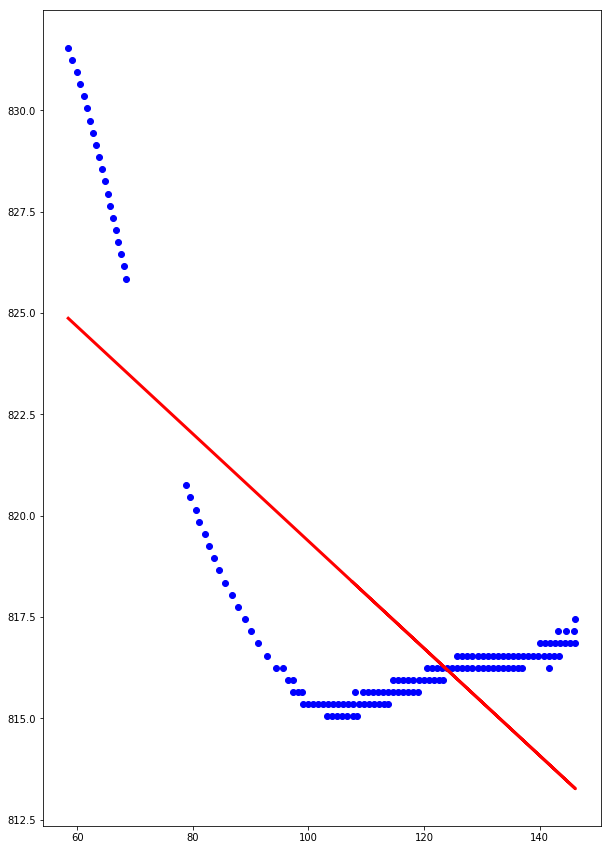

In [64]:
y_values_tracks = []
m_values_tracks = []
c_values_tracks = []

for i in range(len(track_pfos[0]))[:20]:
        
    y = m_tracks[i]*select_driftPos_tracks[i] + c_tracks[i]
    fig = plt.figure(figsize = (10, 15))
    plt.scatter(select_driftPos_tracks[i], select_wirePos_tracks[i], color = 'b')
    plt.plot(select_driftPos_tracks[i], y, color = 'r', linewidth = 3) 
    
    y_values_tracks.append(y)

    m_values_tracks.append(m[i])

    c_values_tracks.append(c[i])

In [10]:
y_values_tracks_sorted = []

for i in range(len(y_values_tracks)):
    y_values_tracks_sorted.append(np.sort(y_values_tracks[i]))

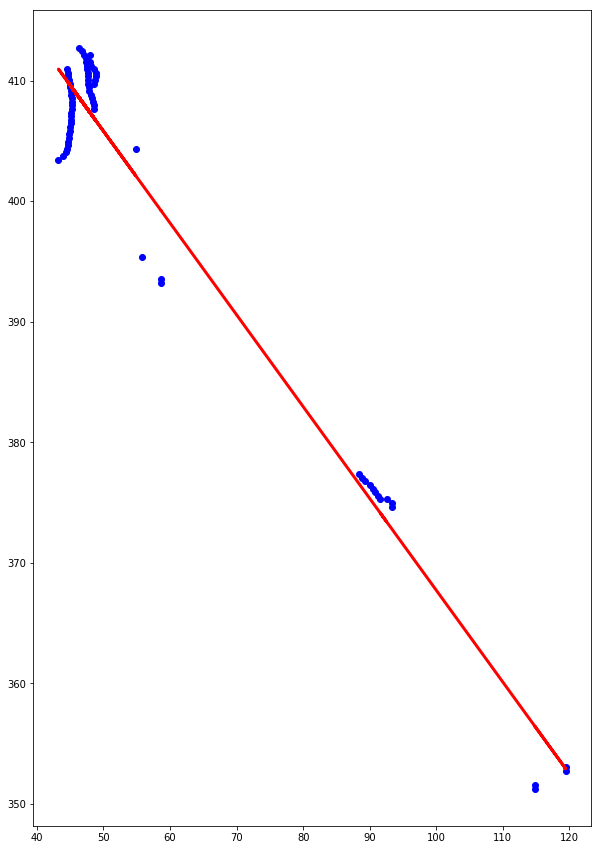

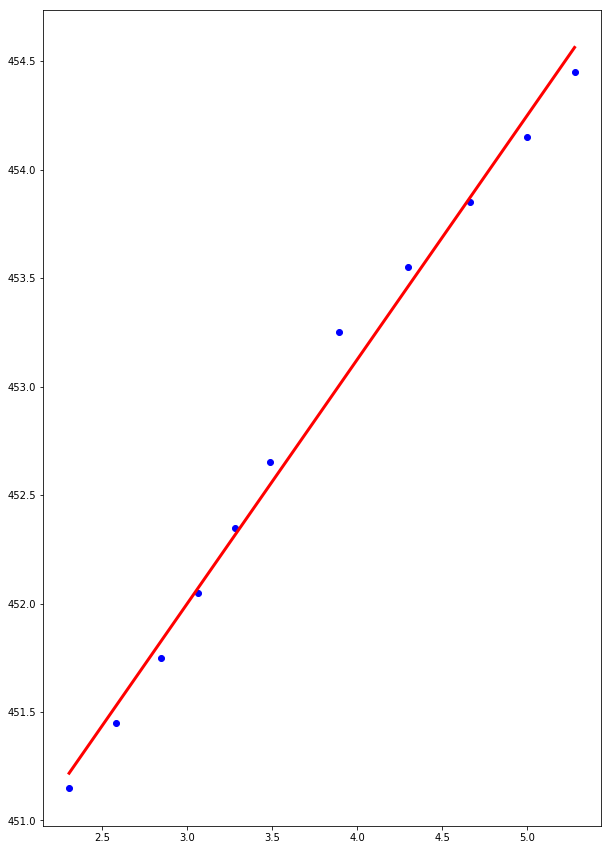

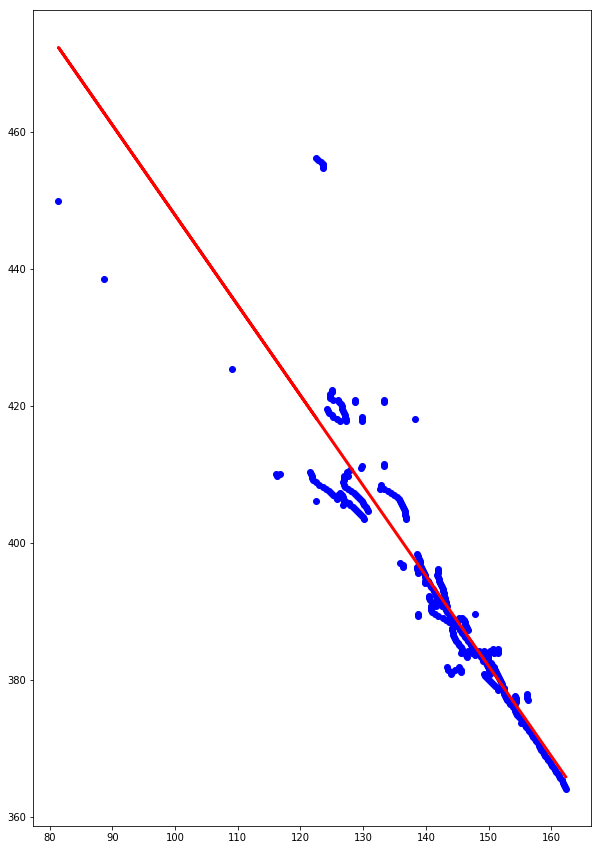

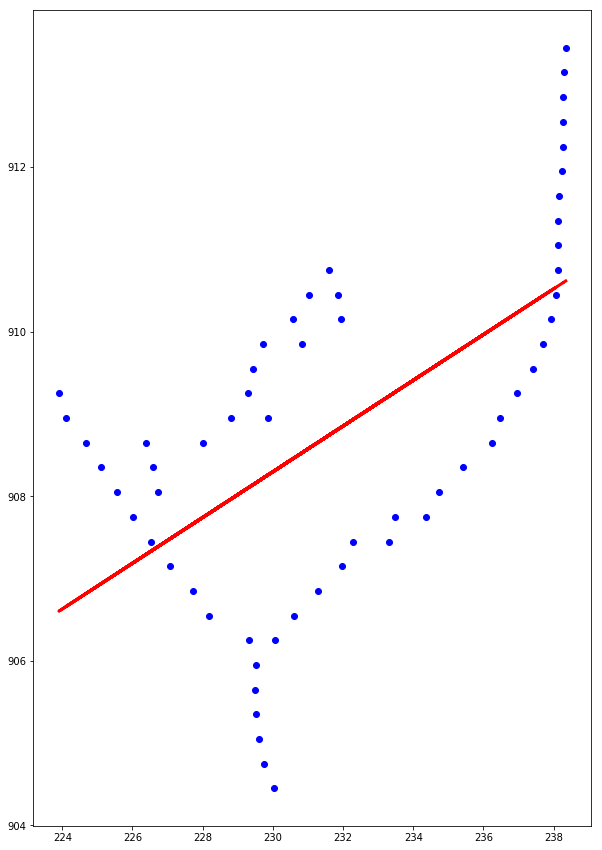

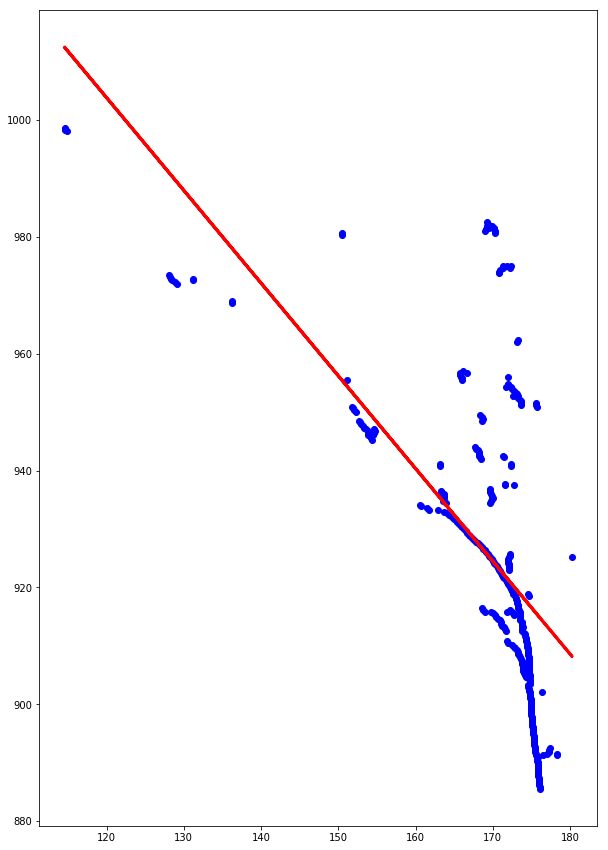

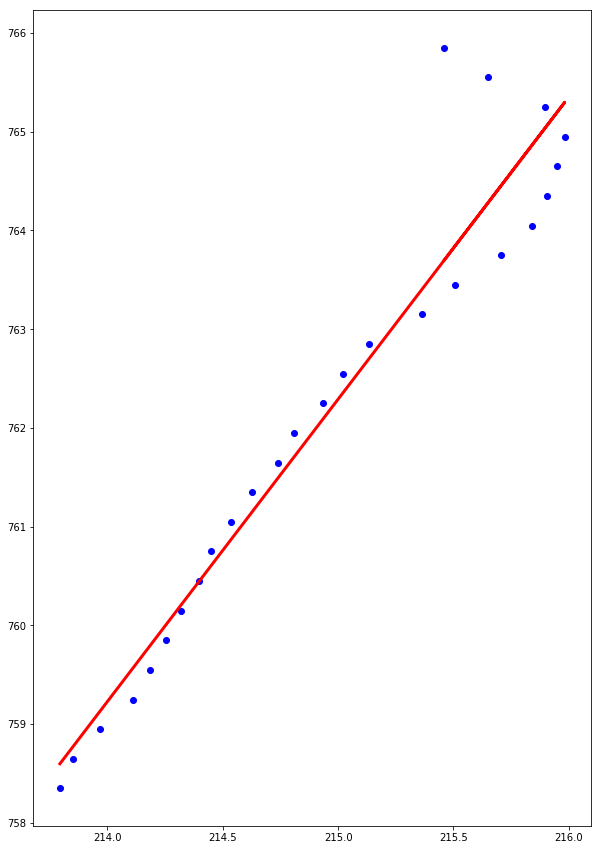

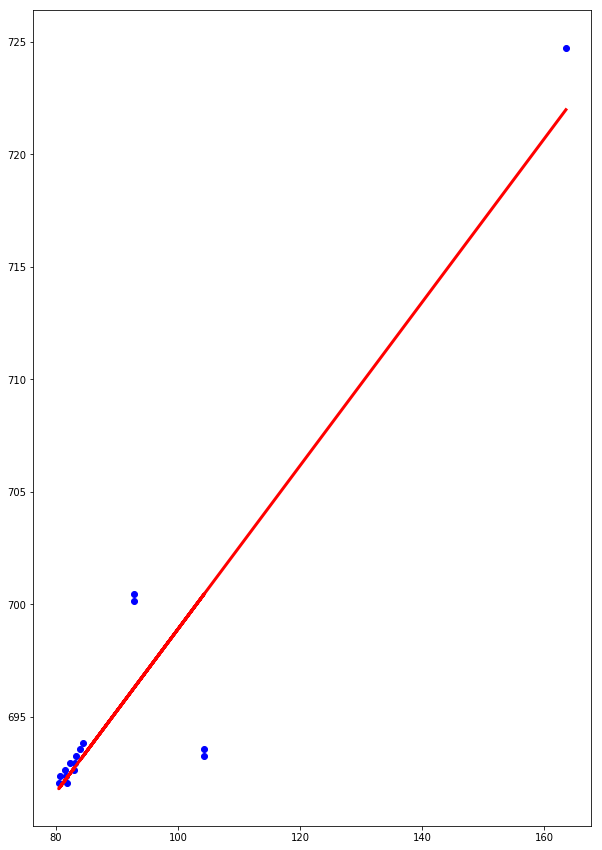

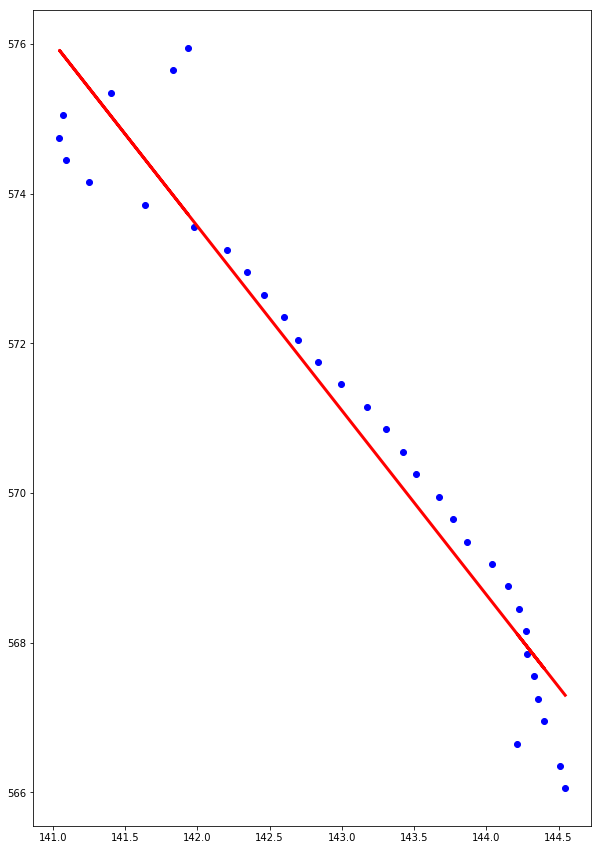

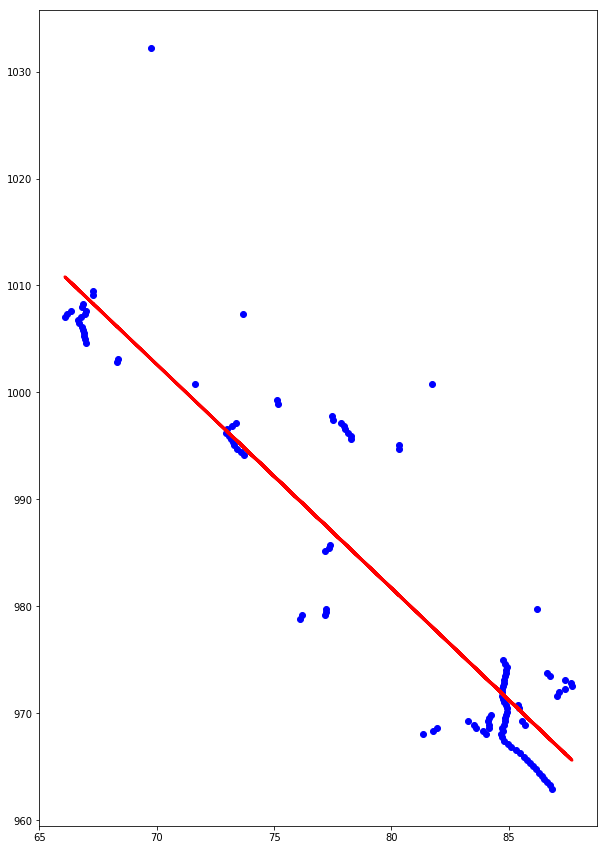

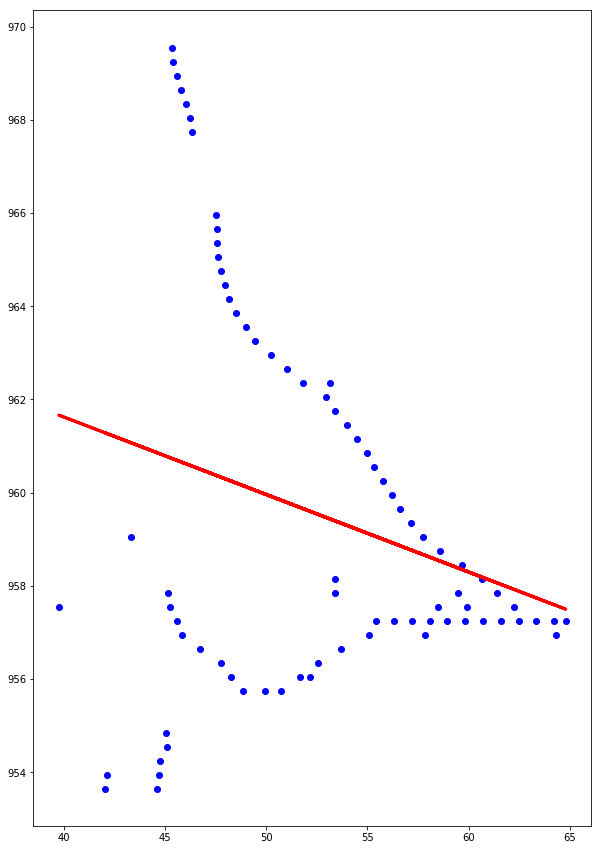

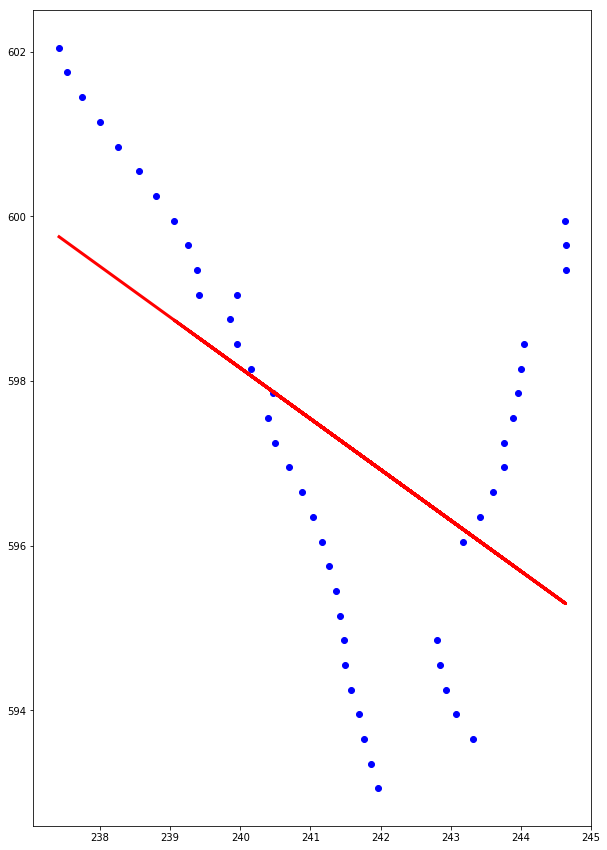

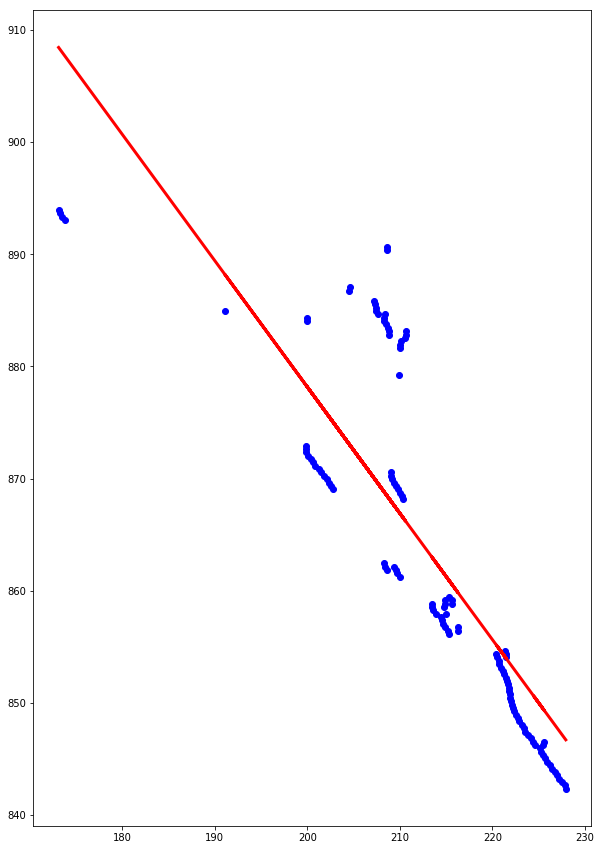

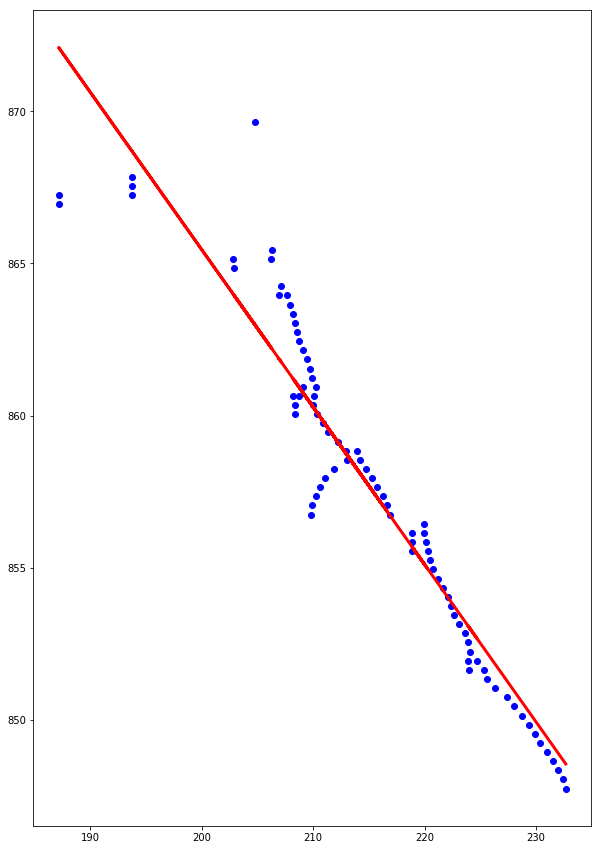

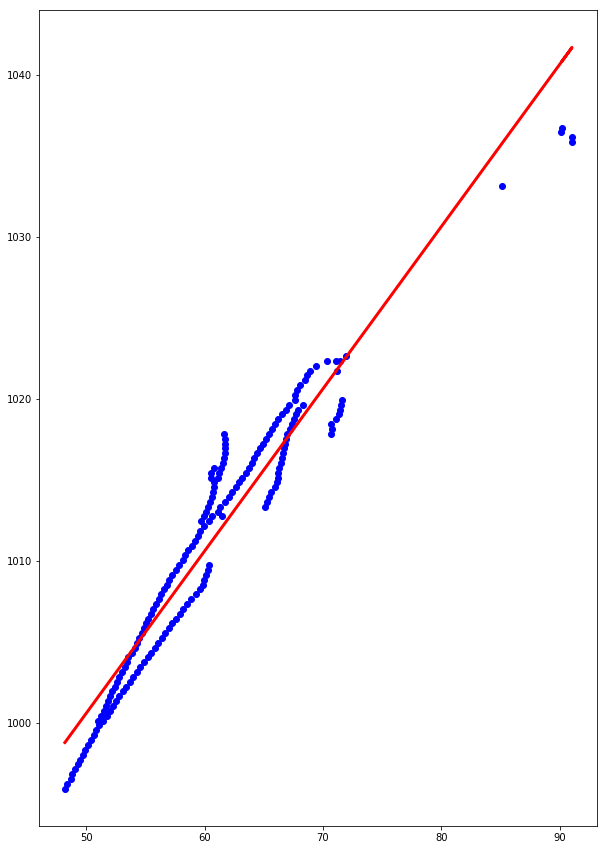

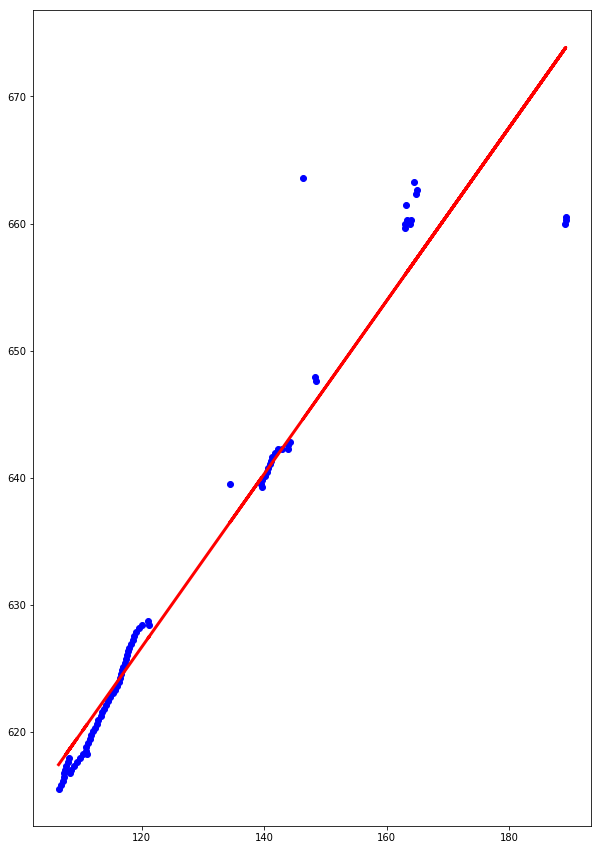

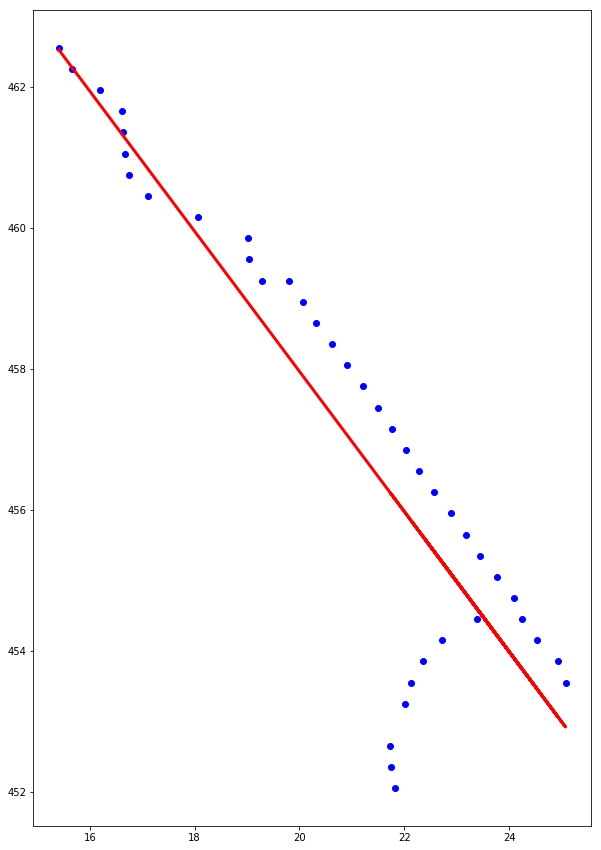

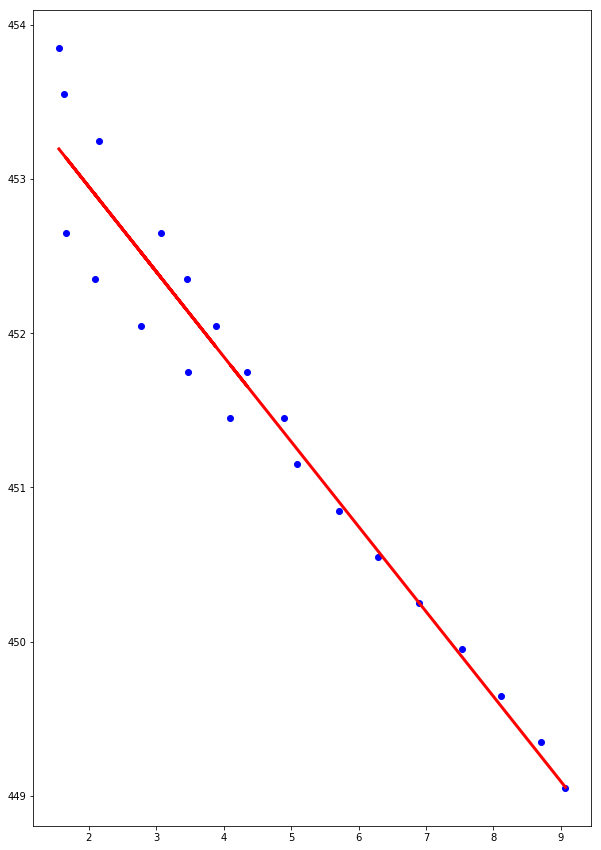

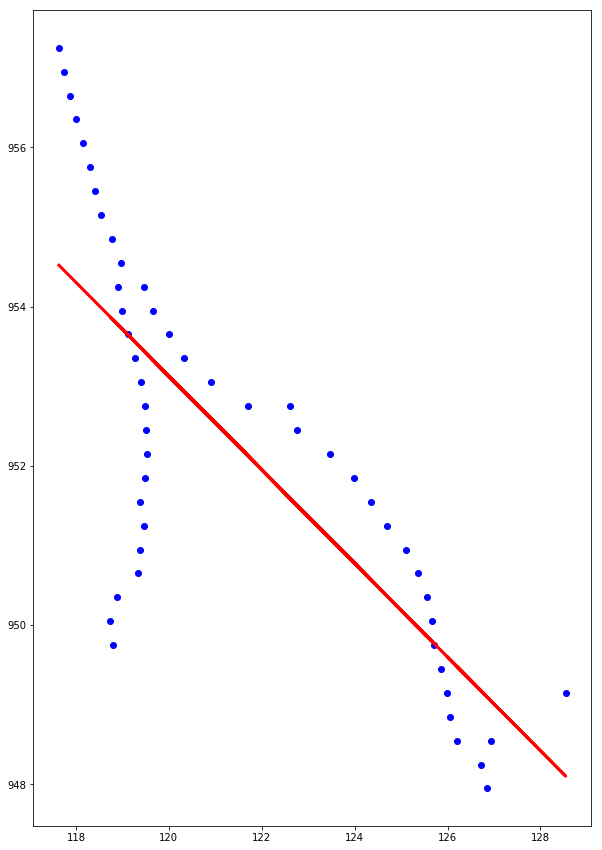

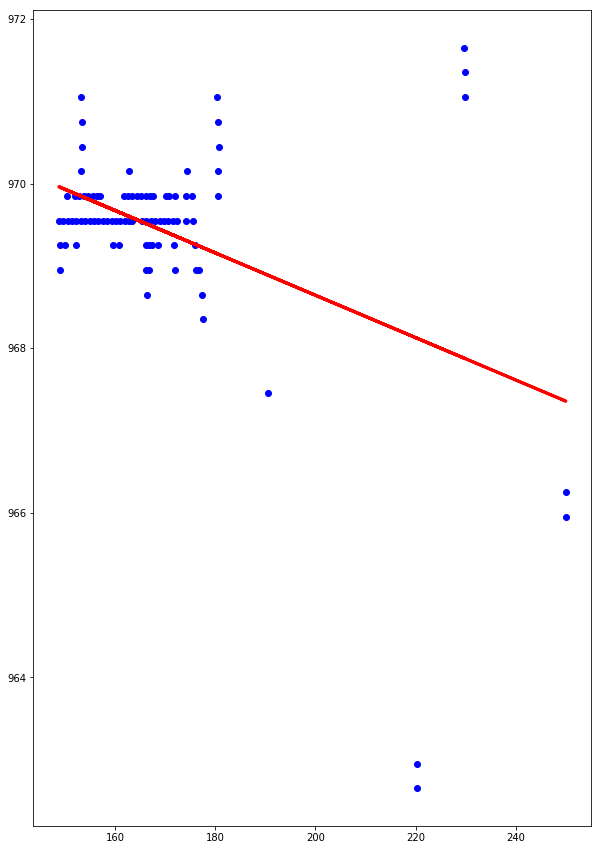

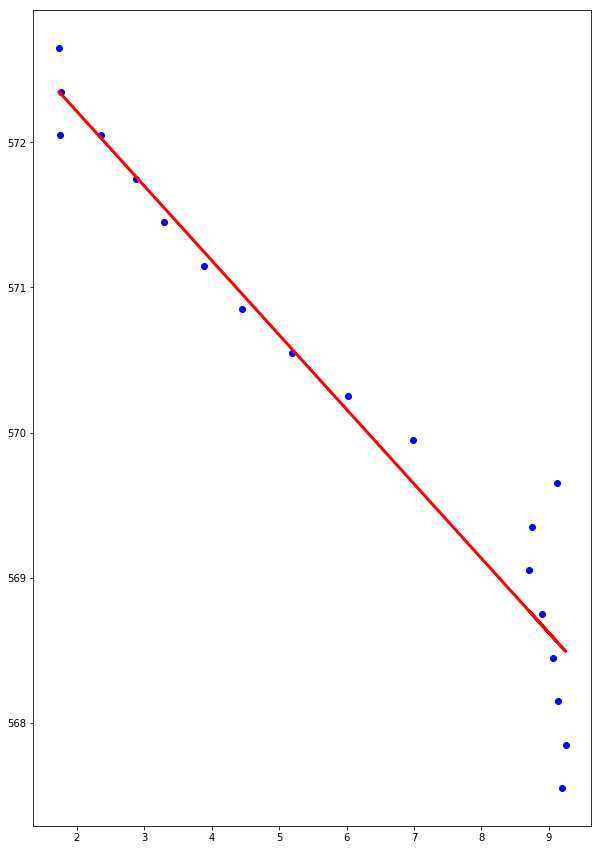

In [65]:
y_values_showers = []
m_values_showers = []
c_values_showers = []

for i in range(len(shower_pfos[0]))[:20]:
        
    y = m_showers[i]*select_driftPos_showers[i] + c_showers[i]
    fig = plt.figure(figsize = (10, 15))
    plt.scatter(select_driftPos_showers[i], select_wirePos_showers[i], color = 'b')
    plt.plot(select_driftPos_showers[i], y, color = 'r', linewidth = 3) 

    y_values_showers.append(y)
    
    m_values_showers.append(m[i])

    c_values_showers.append(c[i])

In [12]:
y_values_showers_sorted = []

for i in range(len(y_values_showers)):
    y_values_showers_sorted.append(np.sort(y_values_showers[i]))

In [13]:
first_y_tracks = []
first_x_tracks = []

for i in range(len(y_values_tracks)):
    
    origin_y = y_values_tracks_sorted[i][0]
    
    origin_x = ((y_values_tracks_sorted[i][0]) - c_values_tracks[i]) / m_values_tracks[i]
    
    first_y_tracks.append(origin_y)
    
    first_x_tracks.append(origin_x)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [21]:
first_y_showers = []
first_x_showers = []

for i in range(len(y_values_showers)):
    
    origin_y = y_values_showers_sorted[i][0]
    
    origin_x = ((y_values_showers_sorted[i][0]) - c_values_showers[i]) / m_values_showers[i]
    
    first_y_showers.append(origin_y)
    
    first_x_showers.append(origin_x)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [133]:
line_theta_track = np.degrees(np.arctan2(first_y_tracks, first_x_tracks))
hit_theta_track = np.degrees(np.arctan2(select_wirePos_tracks, select_driftPos_tracks))
theta_track = abs(line_theta_track - hit_theta_track)

av_theta_track = theta_track.mean()

In [144]:
av_theta_track

array([3.36198680e-01, 3.05417107e-01, 3.90195933e-01, 2.51383683e+00,
       3.43728654e+01, 3.48408466e-01, 8.30257314e-02, 1.72293818e-01,
       5.02758119e+01, 1.55938733e+01, 1.69890575e+01, 1.27423271e+01,
       7.64646926e+00, 1.18929765e+01, 3.33569610e+01, 7.69791054e+00,
       8.49007390e+00, 6.42832718e+00, 1.38788338e+00, 1.08388969e+01,
       3.70510610e+01, 1.14719151e+01, 3.79244499e+01, 2.26886488e+01,
       3.41677668e+01, 8.73252883e+00, 2.06502566e+01, 6.39641366e+01,
       2.85463087e+01, 4.49783268e+00, 6.38081424e+00, 2.23335541e+01,
       3.51296569e-01, 4.17019906e+01, 5.12875906e+01, 4.56308502e+01,
       1.75544848e+01, 7.95553797e+01, 7.01878815e+01, 1.45990298e+01,
       1.13927148e+00, 3.51689446e-01, 1.00923236e+01, 4.18507045e+01,
       9.01327381e+00, 2.18118932e+00, 1.23204883e+01, 2.51590956e+00,
       1.33567936e+01, 1.50195312e+01, 7.04150329e+01, 3.33696973e+00,
       1.22325584e+00, 4.17464645e+01,            nan, 1.56886116e+01,
      

In [157]:
delta_line_shower = np.degrees(np.arctan2(first_y_showers, first_x_showers))
delta_hit_shower = np.degrees(np.arctan2(select_wirePos_showers, select_driftPos_showers))
theta_shower = abs(delta_line_shower - delta_hit_shower)

av_theta_shower = theta_shower.mean()

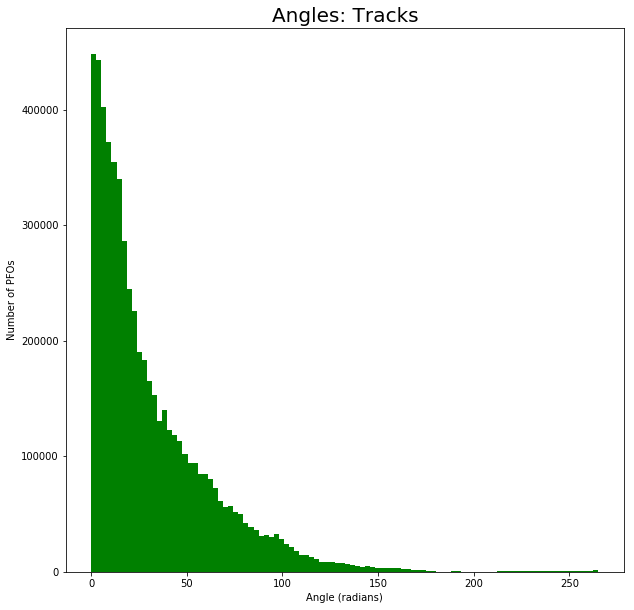

In [158]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(yes, 100, color = 'g')
plt.title('Angles: Tracks', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')

plt.show()

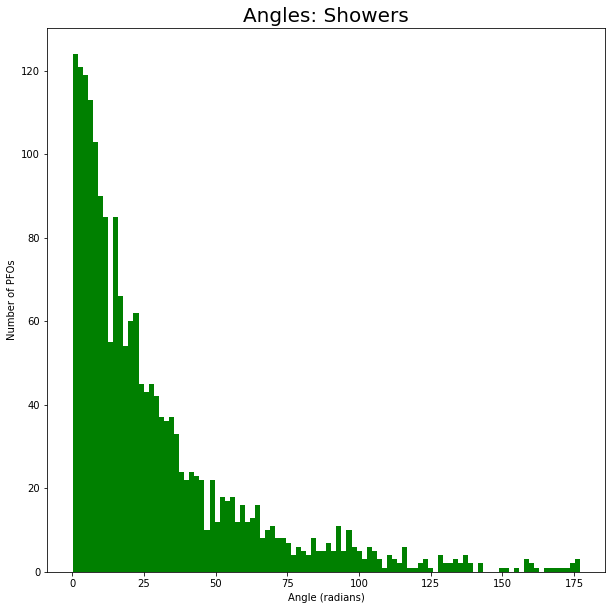

In [73]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_shower, 100, color = 'g')
plt.title('Angles: Showers', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')

plt.show()

In [172]:
weight_tracks = np.ones_like(np.array(av_theta_track)) / len(av_theta_track)
weight_showers = np.ones_like(np.array(av_theta_shower)) / len(av_theta_shower)

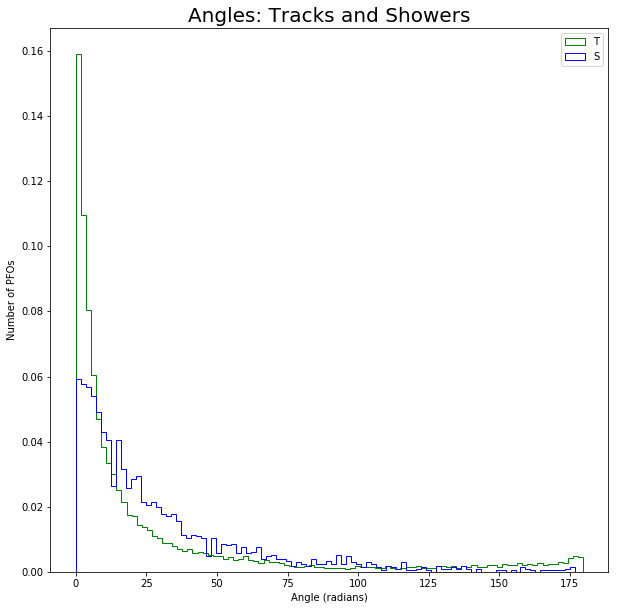

In [176]:
fig = plt.figure(1, figsize=(10, 10))
plt.hist(av_theta_track, 100, weights = weight_tracks, color = 'g', histtype = u'step')
plt.hist(av_theta_shower, 100, weights = weight_showers, color = 'b', histtype = u'step')
plt.title('Angles: Tracks and Showers', fontsize = 20)
plt.xlabel('Angle (radians)')
plt.ylabel('Number of PFOs')


plt.legend('TS')
        
plt.show()